# Proyecto para el curso de IA 2023-1

### Modelos para predecir la cancelación de una reserva hotelera

Tabla de contenidos:



*   Exploración de los Datos
*   Preprocesamiento
*   Construcción de Modelos
*   Discusión y Conclusiones





##  1. Exploración de los Datos



In [1]:
! pip install opendatasets
import opendatasets as od

#para descargar el dataset, es necesario generar credenciales, los pasos para ello están en el link de bit.ly
od.download("https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: clanagram
Your Kaggle Key: ··········


100%|██████████| 1.25M/1.25M [00:00<00:00, 86.9MB/s]

In [38]:
#importando librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [3]:
#lectura de datos
df = pd.read_csv('hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
#revisando cantidad y porcentaje de valores nulos
null = pd.DataFrame({'Valores Nulos' : df.isna().sum(), '% Valores Nulos' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Valores Nulos,% Valores Nulos
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


El porcentaje de reservas canceladas en el hotel es 37.04%


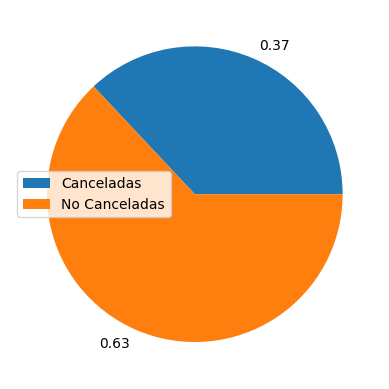

In [7]:
#el hotel puede estar interesado en averiguar cuántas de sus reservas son canceladas, y poder predecir cuando se cancelará una reserva
print(f'El porcentaje de reservas canceladas en el hotel es {round((df["is_canceled"].sum()/len(df["is_canceled"]))*100,2)}%')
y = np.array([round((df["is_canceled"].sum()/len(df["is_canceled"])),2), 1 - round((df["is_canceled"].sum()/len(df["is_canceled"])),2)])
plt.pie(y, labels=y)
plt.legend(['Canceladas', 'No Canceladas'])
plt.show()

La cantidad de reservas que son canceladas es significativa, y por lo tal tener una herramienta con la cual predecir cancelaciones tiene el potencial de ser útil para la hotelera.

## 2. Preprocesamiento

In [8]:
#como necesitamos 3 columnas con >=5% de valores nulos, los simulamos en el dataset
mask = np.random.random(df['children'].shape)<0.05
masked = df['children'].mask(mask)
df['children'] = masked
null = pd.DataFrame({'Valores Nulos' : df.isna().sum(), '% Valores Nulos' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Valores Nulos,% Valores Nulos
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [9]:
#revisamos que clase de variable contienen las columnas de valores nulos, para poder llenarlas adecuadamente
cols_nulas = ['children', 'country', 'agent' , 'company']
for i in cols_nulas:
  print(f'Los únicos valores presentes en la columna {i} son \n  {df[i].unique()}')

Los únicos valores presentes en la columna children son 
  [ 0.  1. nan  2. 10.  3.]
Los únicos valores presentes en la columna country son 
  ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'G

In [10]:
#los valores nulos de la columna "country" pueden reemplazarse arbitrariamente por "desconocido"
##luego, los demás valores númericos representan identificaciones, además de hijos, variables que podemos reemplazar con cero razonablemente
df['country'].fillna('desconocido', inplace = True)
df.fillna(0, inplace = True)

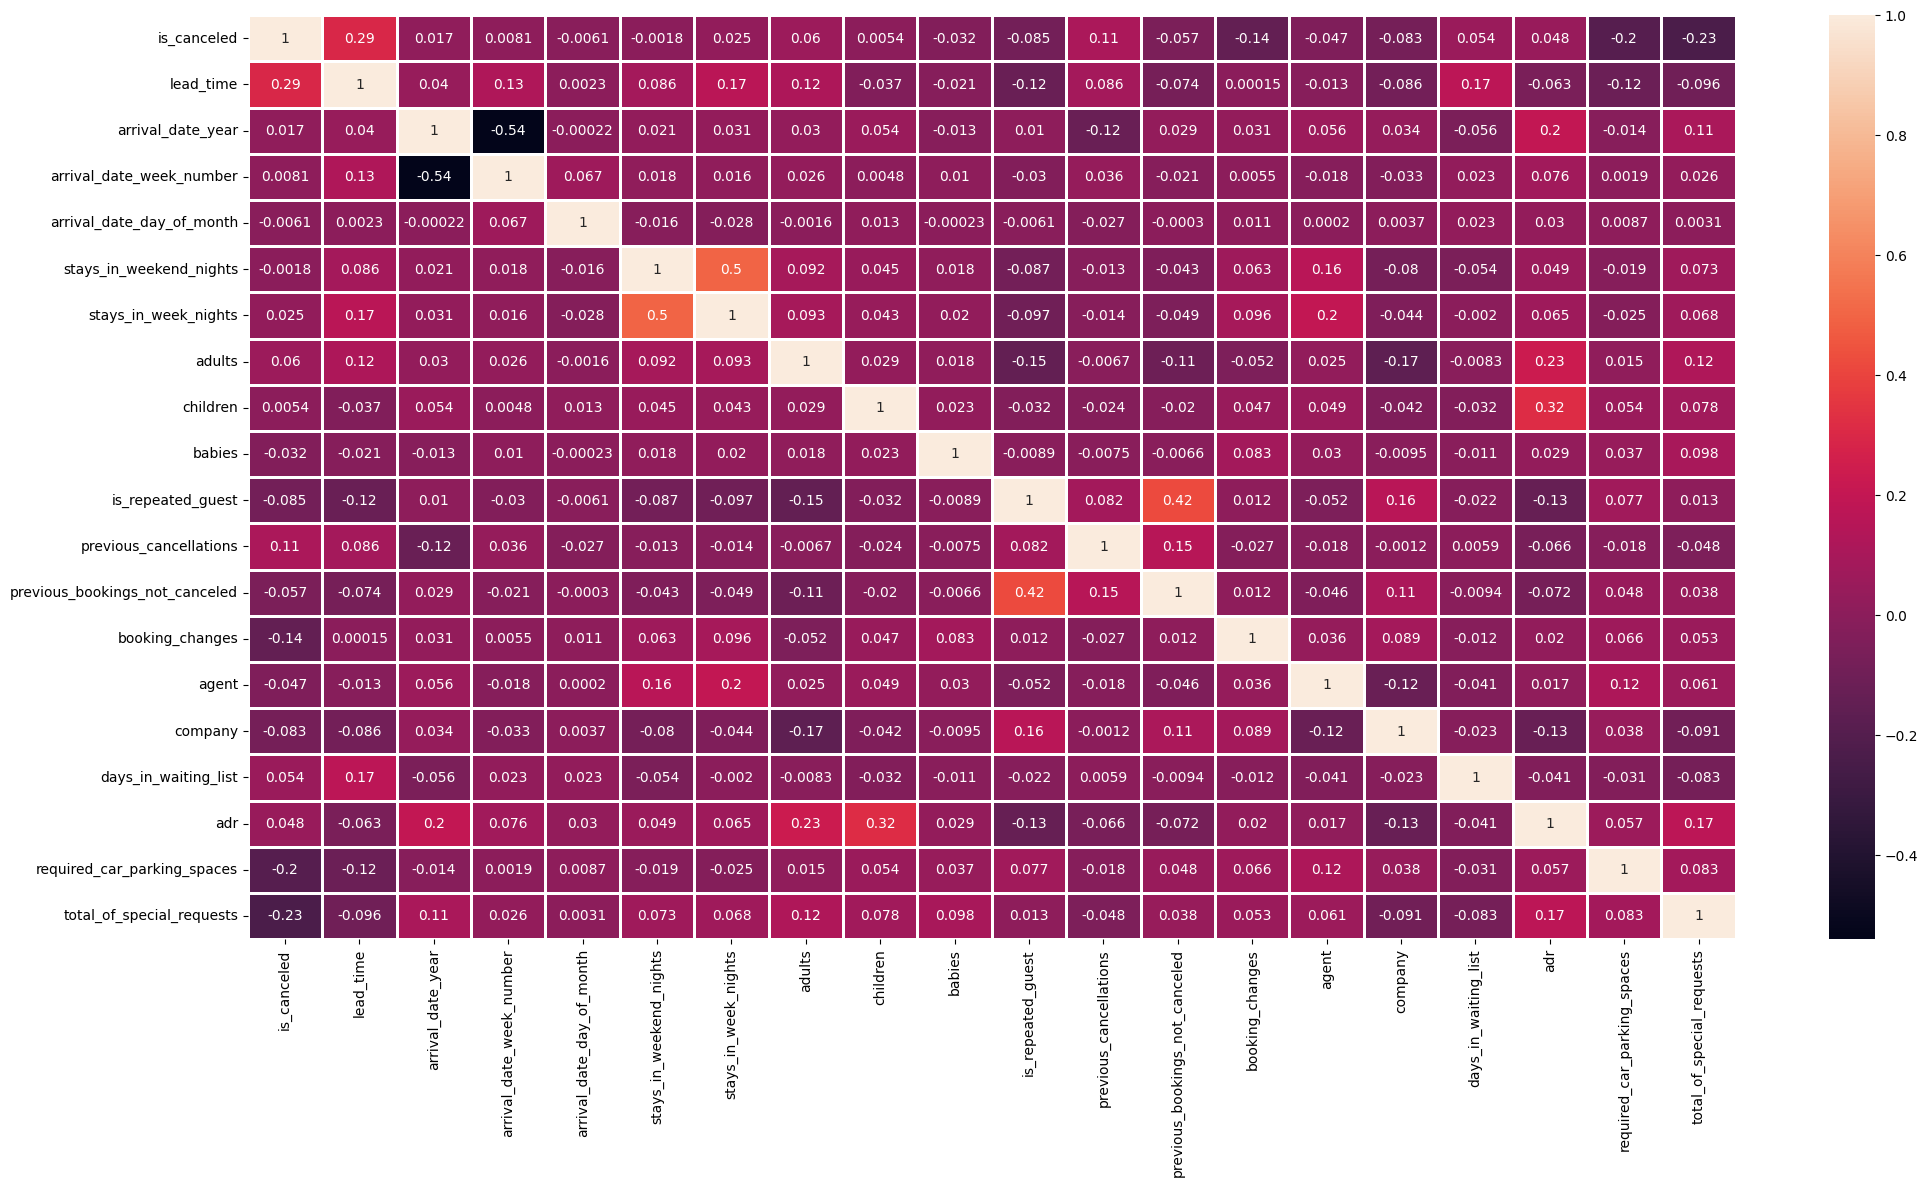

In [11]:
#usando un heatmap, podemos ver qué columnas presentan corelación con nuestro dato de interés
plt.figure(figsize=(24, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

In [12]:
#también podemos visualizar la correlación de las variables a continuación
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005381
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [13]:
#todas las columnas que se descartaran están acá
##notese que descartamos la nacionalidad, mientras que esta puede servir a predecir, no nos pareció sensible usarla
###para probar mejorar el desempeño de los modelos, esta celda puede ser sujeta a cambios
drop_cols = ['arrival_date_year', 'assigned_room_type', 'booking_changes', 'country', 'reservation_status']
df.drop(drop_cols, axis = 1, inplace = True)

In [14]:
#vemos que columnas categóricas tenemos ahora
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [15]:
#análogamente, veamos que columnas numéricas tenemos
df_num = df.drop(columns = cat_cols, axis = 1)
df_num.drop('is_canceled', axis = 1, inplace = True)
list(df_num.columns)

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [16]:
#visualización de la porción categórica del dataframe
df_cat = df[cat_cols]
df_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [17]:
#pasamos las fechas a un formato legible por el modelo
##luego, descartamos las columnas redundantes
df_cat['reservation_status_date'] = pd.to_datetime(df_cat['reservation_status_date'])
df_cat['reservation_status_year'] = df_cat['reservation_status_date'].dt.year
df_cat['reservation_status_month'] = df_cat['reservation_status_date'].dt.month
df_cat['reservation_status_day'] = df_cat['reservation_status_date'].dt.day
df_cat.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
df_cat.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [18]:
#veamos que variables únicas tienen las otras columnas categóricas
for col in df_cat.columns:
    print(f"Para {col}: \n{df_cat[col].unique()}\n")

Para hotel: 
['Resort Hotel' 'City Hotel']

Para meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

Para market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

Para distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

Para reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

Para deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

Para customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

Para reservation_status_year: 
[2015 2014 2016 2017]

Para reservation_status_month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

Para reservation_status_day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [19]:
#se le mapean valores arbitrarios a los valores de cada una de estas columnas
##es posible que alterar estos valores tenga un efecto en la puntuación del modelo
df_cat['hotel'] = df_cat['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df_cat['meal'] = df_cat['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
df_cat['market_segment'] = df_cat['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
df_cat['distribution_channel'] = df_cat['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})
df_cat['deposit_type'] = df_cat['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
df_cat['customer_type'] = df_cat['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
df_cat['reservation_status_year'] = df_cat['reservation_status_year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})
df_cat.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_year,reservation_status_month,reservation_status_day
0,0,0,0,0,0.0,0,0,0,7,1
1,0,0,0,0,0.0,0,0,0,7,1
2,0,0,0,0,1.0,0,0,0,7,2
3,0,0,1,1,1.0,0,0,0,7,2
4,0,0,2,2,1.0,0,0,0,7,3


In [20]:
#para las columnas de variables numéricas, un método de normalización ayuda a que el modelo no le dé prioridad indebida a ciertas columnas
#visualizamos a continuación la varianza de las diferentes columnas sin normalizar
df_num.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.151988
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             11479.398119
company                            2909.942594
days_in_waiting_list                309.574203
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

In [21]:
#se aplicará un método de normalización logaritmica para aquellas columnas que lo requieren
##cambiar el método puede afectar el puntaje del modelo
df_num['lead_time'] = np.log(df_num['lead_time'] + 1)
df_num['arrival_date_week_number'] = np.log(df_num['arrival_date_week_number'] + 1)
df_num['arrival_date_day_of_month'] = np.log(df_num['arrival_date_day_of_month'] + 1)
df_num['agent'] = np.log(df_num['agent'] + 1)
df_num['company'] = np.log(df_num['company'] + 1)
df_num['days_in_waiting_list'] = np.log(df_num['days_in_waiting_list'] + 1)
df_num['adr'] = np.log(df_num['adr'] + 1)
df_num.var()

lead_time                         2.591420
arrival_date_week_number          0.441039
arrival_date_day_of_month         0.506267
stays_in_weekend_nights           0.997229
stays_in_week_nights              3.641554
adults                            0.335543
children                          0.151988
babies                            0.009494
is_repeated_guest                 0.030894
previous_cancellations            0.712904
previous_bookings_not_canceled    2.242317
agent                             3.536189
company                           1.350926
days_in_waiting_list              0.503967
adr                               0.540353
required_car_parking_spaces       0.060168
total_of_special_requests         0.628529
dtype: float64

In [29]:
#finalmente, tenemos nuestro dataframe "X" preprocesado, y hacemos splits de test y de train
##se puede jugar con el test size para probar en el modelo
X = pd.concat([df_cat, df_num], axis = 1).fillna(0)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_year,reservation_status_month,reservation_status_day,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,0,0,0.0,0,0,0,7,1,...,0,0,0,0,0.000000,0.0,0.0,0.000000,0,0
1,0,0,0,0,0.0,0,0,0,7,1,...,0,0,0,0,0.000000,0.0,0.0,0.000000,0,0
2,0,0,0,0,1.0,0,0,0,7,2,...,0,0,0,0,0.000000,0.0,0.0,4.330733,0,0
3,0,0,1,1,1.0,0,0,0,7,2,...,0,0,0,0,5.720312,0.0,0.0,4.330733,0,0
4,0,0,2,2,1.0,0,0,0,7,3,...,0,0,0,0,5.484797,0.0,0.0,4.595120,0,1


##  3. Construcción de Modelos

In [30]:
#Importando Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
#Usando LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Puntaje de Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Puntaje de Logistic Regression : 0.8131613479632577
Confusion Matrix : 
[[21393  1205]
 [ 5487  7732]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.86     22598
           1       0.87      0.58      0.70     13219

    accuracy                           0.81     35817
   macro avg       0.83      0.77      0.78     35817
weighted avg       0.82      0.81      0.80     35817



In [32]:
#Usando KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Puntaje de KNN : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Puntaje de KNN : 0.8910014797442555
Confusion Matrix : 
[[21771   827]
 [ 3077 10142]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     22598
           1       0.92      0.77      0.84     13219

    accuracy                           0.89     35817
   macro avg       0.90      0.87      0.88     35817
weighted avg       0.89      0.89      0.89     35817



In [33]:
#Usando DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Puntaje de Decision Tree : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Puntaje de Decision Tree : 0.9430158863109697
Confusion Matrix : 
[[21575  1023]
 [ 1018 12201]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22598
           1       0.92      0.92      0.92     13219

    accuracy                           0.94     35817
   macro avg       0.94      0.94      0.94     35817
weighted avg       0.94      0.94      0.94     35817



In [34]:
#Usando RandomForestClassifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)
y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Puntaje de Random Forest : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Puntaje de Random Forest : 0.9525365050115867
Confusion Matrix : 
[[22371   227]
 [ 1473 11746]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22598
           1       0.98      0.89      0.93     13219

    accuracy                           0.95     35817
   macro avg       0.96      0.94      0.95     35817
weighted avg       0.95      0.95      0.95     35817



In [35]:
#Usando GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Puntaje de Gradient Boosting Classifier : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Puntaje de Gradient Boosting Classifier : 0.9194516570343692
Confusion Matrix : 
[[22367   231]
 [ 2654 10565]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     22598
           1       0.98      0.80      0.88     13219

    accuracy                           0.92     35817
   macro avg       0.94      0.89      0.91     35817
weighted avg       0.93      0.92      0.92     35817



##  4. Discusión y Conclusiones

In [36]:
#Comparamos el desempeño de los diferentes modelos usados
##Estos aún pueden refinarse más aún jugando con los distintos parametros
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_gb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.952537
2,Decision Tree Classifier,0.943016
4,Gradient Boosting Classifier,0.919452
1,KNN,0.891001
0,Logistic Regression,0.813161


In [39]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')